# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [3]:
client = MongoClient(mongod_connect)
db = client.gp32 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [4]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [5]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.430160128681514,-81.62600487753,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [6]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [8]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Dec 16 16:44:16 +0000 2020'
'Wed Dec 16 16:44:16 +0000 2020'
'Wed Dec 16 16:44:16 +0000 2020'
'Wed Dec 16 16:44:16 +0000 2020'
'Wed Dec 16 16:44:16 +0000 2020'
'Wed Dec 16 16:44:15 +0000 2020'
'Wed Dec 16 16:44:15 +0000 2020'
'Wed Dec 16 16:44:14 +0000 2020'
'Wed Dec 16 16:44:14 +0000 2020'
'Wed Dec 16 16:44:14 +0000 2020'
'Wed Dec 16 16:44:14 +0000 2020'
'Wed Dec 16 16:44:14 +0000 2020'
'Wed Dec 16 16:44:14 +0000 2020'
'Wed Dec 16 16:44:13 +0000 2020'
'Wed Dec 16 16:44:13 +0000 2020'
'Wed Dec 16 16:44:13 +0000 2020'
'Wed Dec 16 16:44:13 +0000 2020'
'Wed Dec 16 16:44:13 +0000 2020'
'Wed Dec 16 16:44:13 +0000 2020'
'Wed Dec 16 16:44:13 +0000 2020'
'Wed Dec 16 16:44:13 +0000 2020'
'Wed Dec 16 16:44:13 +0000 2020'
'Wed Dec 16 16:44:13 +0000 2020'
'Wed Dec 16 16:44:13 +0000 2020'
'Wed Dec 16 16:44:13 +0000 2020'
'Wed Dec 16 16:44:12 +0000 2020'
'Wed Dec 16 16:44:12 +0000 2020'
'Wed Dec 16 16:44:12 +0000 2020'
'Wed Dec 16 16:44:12 +0000 2020'
'Wed Dec 16 16:44:11 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:43:29 +0000 2020'
'Wed Dec 16 16:43:29 +0000 2020'
'Wed Dec 16 16:43:29 +0000 2020'
'Wed Dec 16 16:43:29 +0000 2020'
'Wed Dec 16 16:43:29 +0000 2020'
'Wed Dec 16 16:43:29 +0000 2020'
'Wed Dec 16 16:43:29 +0000 2020'
'Wed Dec 16 16:43:29 +0000 2020'
'Wed Dec 16 16:43:29 +0000 2020'
'Wed Dec 16 16:43:29 +0000 2020'
'Wed Dec 16 16:43:28 +0000 2020'
'Wed Dec 16 16:43:28 +0000 2020'
'Wed Dec 16 16:43:28 +0000 2020'
'Wed Dec 16 16:43:27 +0000 2020'
'Wed Dec 16 16:43:27 +0000 2020'
'Wed Dec 16 16:43:27 +0000 2020'
'Wed Dec 16 16:43:27 +0000 2020'
'Wed Dec 16 16:43:27 +0000 2020'
'Wed Dec 16 16:43:27 +0000 2020'
'Wed Dec 16 16:43:27 +0000 2020'
'Wed Dec 16 16:43:26 +0000 2020'
'Wed Dec 16 16:43:26 +0000 2020'
'Wed Dec 16 16:43:26 +0000 2020'
'Wed Dec 16 16:43:26 +0000 2020'
'Wed Dec 16 16:43:26 +0000 2020'
'Wed Dec 16 16:43:25 +0000 2020'
'Wed Dec 16 16:43:25 +0000 2020'
'Wed Dec 16 16:43:25 +0000 2020'
'Wed Dec 16 16:43:25 +0000 2020'
'Wed Dec 16 16:43:25 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:42:43 +0000 2020'
'Wed Dec 16 16:42:43 +0000 2020'
'Wed Dec 16 16:42:43 +0000 2020'
'Wed Dec 16 16:42:43 +0000 2020'
'Wed Dec 16 16:42:43 +0000 2020'
'Wed Dec 16 16:42:43 +0000 2020'
'Wed Dec 16 16:42:42 +0000 2020'
'Wed Dec 16 16:42:42 +0000 2020'
'Wed Dec 16 16:42:42 +0000 2020'
'Wed Dec 16 16:42:42 +0000 2020'
'Wed Dec 16 16:42:42 +0000 2020'
'Wed Dec 16 16:42:42 +0000 2020'
'Wed Dec 16 16:42:42 +0000 2020'
'Wed Dec 16 16:42:42 +0000 2020'
'Wed Dec 16 16:42:42 +0000 2020'
'Wed Dec 16 16:42:42 +0000 2020'
'Wed Dec 16 16:42:41 +0000 2020'
'Wed Dec 16 16:42:41 +0000 2020'
'Wed Dec 16 16:42:41 +0000 2020'
'Wed Dec 16 16:42:41 +0000 2020'
'Wed Dec 16 16:42:41 +0000 2020'
'Wed Dec 16 16:42:41 +0000 2020'
'Wed Dec 16 16:42:40 +0000 2020'
'Wed Dec 16 16:42:39 +0000 2020'
'Wed Dec 16 16:42:39 +0000 2020'
'Wed Dec 16 16:42:39 +0000 2020'
'Wed Dec 16 16:42:39 +0000 2020'
'Wed Dec 16 16:42:39 +0000 2020'
'Wed Dec 16 16:42:39 +0000 2020'
'Wed Dec 16 16:42:39 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:42:00 +0000 2020'
'Wed Dec 16 16:42:00 +0000 2020'
'Wed Dec 16 16:42:00 +0000 2020'
'Wed Dec 16 16:42:00 +0000 2020'
'Wed Dec 16 16:41:59 +0000 2020'
'Wed Dec 16 16:41:59 +0000 2020'
'Wed Dec 16 16:41:59 +0000 2020'
'Wed Dec 16 16:41:59 +0000 2020'
'Wed Dec 16 16:41:59 +0000 2020'
'Wed Dec 16 16:41:59 +0000 2020'
'Wed Dec 16 16:41:59 +0000 2020'
'Wed Dec 16 16:41:59 +0000 2020'
'Wed Dec 16 16:41:59 +0000 2020'
'Wed Dec 16 16:41:58 +0000 2020'
'Wed Dec 16 16:41:58 +0000 2020'
'Wed Dec 16 16:41:58 +0000 2020'
'Wed Dec 16 16:41:58 +0000 2020'
'Wed Dec 16 16:41:58 +0000 2020'
'Wed Dec 16 16:41:57 +0000 2020'
'Wed Dec 16 16:41:57 +0000 2020'
'Wed Dec 16 16:41:57 +0000 2020'
'Wed Dec 16 16:41:57 +0000 2020'
'Wed Dec 16 16:41:57 +0000 2020'
'Wed Dec 16 16:41:56 +0000 2020'
'Wed Dec 16 16:41:56 +0000 2020'
'Wed Dec 16 16:41:56 +0000 2020'
'Wed Dec 16 16:41:56 +0000 2020'
'Wed Dec 16 16:41:56 +0000 2020'
'Wed Dec 16 16:41:55 +0000 2020'
'Wed Dec 16 16:41:55 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:41:14 +0000 2020'
'Wed Dec 16 16:41:13 +0000 2020'
'Wed Dec 16 16:41:13 +0000 2020'
'Wed Dec 16 16:41:13 +0000 2020'
'Wed Dec 16 16:41:13 +0000 2020'
'Wed Dec 16 16:41:13 +0000 2020'
'Wed Dec 16 16:41:13 +0000 2020'
'Wed Dec 16 16:41:12 +0000 2020'
'Wed Dec 16 16:41:12 +0000 2020'
'Wed Dec 16 16:41:12 +0000 2020'
'Wed Dec 16 16:41:12 +0000 2020'
'Wed Dec 16 16:41:12 +0000 2020'
'Wed Dec 16 16:41:12 +0000 2020'
'Wed Dec 16 16:41:11 +0000 2020'
'Wed Dec 16 16:41:11 +0000 2020'
'Wed Dec 16 16:41:11 +0000 2020'
'Wed Dec 16 16:41:11 +0000 2020'
'Wed Dec 16 16:41:11 +0000 2020'
'Wed Dec 16 16:41:11 +0000 2020'
'Wed Dec 16 16:41:11 +0000 2020'
'Wed Dec 16 16:41:11 +0000 2020'
'Wed Dec 16 16:41:11 +0000 2020'
'Wed Dec 16 16:41:11 +0000 2020'
'Wed Dec 16 16:41:10 +0000 2020'
'Wed Dec 16 16:41:10 +0000 2020'
'Wed Dec 16 16:41:10 +0000 2020'
'Wed Dec 16 16:41:10 +0000 2020'
'Wed Dec 16 16:41:09 +0000 2020'
'Wed Dec 16 16:41:09 +0000 2020'
'Wed Dec 16 16:41:09 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:40:34 +0000 2020'
'Wed Dec 16 16:40:34 +0000 2020'
'Wed Dec 16 16:40:33 +0000 2020'
'Wed Dec 16 16:40:33 +0000 2020'
'Wed Dec 16 16:40:33 +0000 2020'
'Wed Dec 16 16:40:33 +0000 2020'
'Wed Dec 16 16:40:33 +0000 2020'
'Wed Dec 16 16:40:33 +0000 2020'
'Wed Dec 16 16:40:33 +0000 2020'
'Wed Dec 16 16:40:33 +0000 2020'
'Wed Dec 16 16:40:33 +0000 2020'
'Wed Dec 16 16:40:33 +0000 2020'
'Wed Dec 16 16:40:32 +0000 2020'
'Wed Dec 16 16:40:32 +0000 2020'
'Wed Dec 16 16:40:32 +0000 2020'
'Wed Dec 16 16:40:32 +0000 2020'
'Wed Dec 16 16:40:31 +0000 2020'
'Wed Dec 16 16:40:31 +0000 2020'
'Wed Dec 16 16:40:31 +0000 2020'
'Wed Dec 16 16:40:31 +0000 2020'
'Wed Dec 16 16:40:31 +0000 2020'
'Wed Dec 16 16:40:31 +0000 2020'
'Wed Dec 16 16:40:31 +0000 2020'
'Wed Dec 16 16:40:31 +0000 2020'
'Wed Dec 16 16:40:30 +0000 2020'
'Wed Dec 16 16:40:30 +0000 2020'
'Wed Dec 16 16:40:30 +0000 2020'
'Wed Dec 16 16:40:30 +0000 2020'
'Wed Dec 16 16:40:30 +0000 2020'
'Wed Dec 16 16:40:30 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:39:53 +0000 2020'
'Wed Dec 16 16:39:53 +0000 2020'
'Wed Dec 16 16:39:53 +0000 2020'
'Wed Dec 16 16:39:53 +0000 2020'
'Wed Dec 16 16:39:53 +0000 2020'
'Wed Dec 16 16:39:53 +0000 2020'
'Wed Dec 16 16:39:52 +0000 2020'
'Wed Dec 16 16:39:52 +0000 2020'
'Wed Dec 16 16:39:52 +0000 2020'
'Wed Dec 16 16:39:52 +0000 2020'
'Wed Dec 16 16:39:51 +0000 2020'
'Wed Dec 16 16:39:51 +0000 2020'
'Wed Dec 16 16:39:51 +0000 2020'
'Wed Dec 16 16:39:51 +0000 2020'
'Wed Dec 16 16:39:51 +0000 2020'
'Wed Dec 16 16:39:51 +0000 2020'
'Wed Dec 16 16:39:51 +0000 2020'
'Wed Dec 16 16:39:51 +0000 2020'
'Wed Dec 16 16:39:50 +0000 2020'
'Wed Dec 16 16:39:50 +0000 2020'
'Wed Dec 16 16:39:50 +0000 2020'
'Wed Dec 16 16:39:50 +0000 2020'
'Wed Dec 16 16:39:50 +0000 2020'
'Wed Dec 16 16:39:50 +0000 2020'
'Wed Dec 16 16:39:50 +0000 2020'
'Wed Dec 16 16:39:49 +0000 2020'
'Wed Dec 16 16:39:49 +0000 2020'
'Wed Dec 16 16:39:49 +0000 2020'
'Wed Dec 16 16:39:49 +0000 2020'
'Wed Dec 16 16:39:48 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:39:04 +0000 2020'
'Wed Dec 16 16:39:03 +0000 2020'
'Wed Dec 16 16:39:03 +0000 2020'
'Wed Dec 16 16:39:03 +0000 2020'
'Wed Dec 16 16:39:02 +0000 2020'
'Wed Dec 16 16:39:02 +0000 2020'
'Wed Dec 16 16:39:02 +0000 2020'
'Wed Dec 16 16:39:02 +0000 2020'
'Wed Dec 16 16:39:02 +0000 2020'
'Wed Dec 16 16:39:02 +0000 2020'
'Wed Dec 16 16:39:02 +0000 2020'
'Wed Dec 16 16:39:01 +0000 2020'
'Wed Dec 16 16:39:01 +0000 2020'
'Wed Dec 16 16:39:01 +0000 2020'
'Wed Dec 16 16:39:01 +0000 2020'
'Wed Dec 16 16:39:01 +0000 2020'
'Wed Dec 16 16:39:01 +0000 2020'
'Wed Dec 16 16:39:00 +0000 2020'
'Wed Dec 16 16:39:00 +0000 2020'
'Wed Dec 16 16:39:00 +0000 2020'
'Wed Dec 16 16:39:00 +0000 2020'
'Wed Dec 16 16:38:59 +0000 2020'
'Wed Dec 16 16:38:59 +0000 2020'
'Wed Dec 16 16:38:59 +0000 2020'
'Wed Dec 16 16:38:59 +0000 2020'
'Wed Dec 16 16:38:59 +0000 2020'
'Wed Dec 16 16:38:59 +0000 2020'
'Wed Dec 16 16:38:59 +0000 2020'
'Wed Dec 16 16:38:59 +0000 2020'
'Wed Dec 16 16:38:58 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:38:20 +0000 2020'
'Wed Dec 16 16:38:19 +0000 2020'
'Wed Dec 16 16:38:19 +0000 2020'
'Wed Dec 16 16:38:19 +0000 2020'
'Wed Dec 16 16:38:19 +0000 2020'
'Wed Dec 16 16:38:19 +0000 2020'
'Wed Dec 16 16:38:19 +0000 2020'
'Wed Dec 16 16:38:19 +0000 2020'
'Wed Dec 16 16:38:18 +0000 2020'
'Wed Dec 16 16:38:18 +0000 2020'
'Wed Dec 16 16:38:18 +0000 2020'
'Wed Dec 16 16:38:18 +0000 2020'
'Wed Dec 16 16:38:18 +0000 2020'
'Wed Dec 16 16:38:18 +0000 2020'
'Wed Dec 16 16:38:17 +0000 2020'
'Wed Dec 16 16:38:17 +0000 2020'
'Wed Dec 16 16:38:17 +0000 2020'
'Wed Dec 16 16:38:17 +0000 2020'
'Wed Dec 16 16:38:17 +0000 2020'
'Wed Dec 16 16:38:16 +0000 2020'
'Wed Dec 16 16:38:16 +0000 2020'
'Wed Dec 16 16:38:16 +0000 2020'
'Wed Dec 16 16:38:16 +0000 2020'
'Wed Dec 16 16:38:16 +0000 2020'
'Wed Dec 16 16:38:15 +0000 2020'
'Wed Dec 16 16:38:15 +0000 2020'
'Wed Dec 16 16:38:15 +0000 2020'
'Wed Dec 16 16:38:15 +0000 2020'
'Wed Dec 16 16:38:15 +0000 2020'
'Wed Dec 16 16:38:15 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:37:41 +0000 2020'
'Wed Dec 16 16:37:41 +0000 2020'
'Wed Dec 16 16:37:41 +0000 2020'
'Wed Dec 16 16:37:40 +0000 2020'
'Wed Dec 16 16:37:40 +0000 2020'
'Wed Dec 16 16:37:40 +0000 2020'
'Wed Dec 16 16:37:40 +0000 2020'
'Wed Dec 16 16:37:40 +0000 2020'
'Wed Dec 16 16:37:40 +0000 2020'
'Wed Dec 16 16:37:39 +0000 2020'
'Wed Dec 16 16:37:39 +0000 2020'
'Wed Dec 16 16:37:39 +0000 2020'
'Wed Dec 16 16:37:39 +0000 2020'
'Wed Dec 16 16:37:39 +0000 2020'
'Wed Dec 16 16:37:39 +0000 2020'
'Wed Dec 16 16:37:39 +0000 2020'
'Wed Dec 16 16:37:39 +0000 2020'
'Wed Dec 16 16:37:39 +0000 2020'
'Wed Dec 16 16:37:38 +0000 2020'
'Wed Dec 16 16:37:38 +0000 2020'
'Wed Dec 16 16:37:37 +0000 2020'
'Wed Dec 16 16:37:37 +0000 2020'
'Wed Dec 16 16:37:37 +0000 2020'
'Wed Dec 16 16:37:37 +0000 2020'
'Wed Dec 16 16:37:37 +0000 2020'
'Wed Dec 16 16:37:37 +0000 2020'
'Wed Dec 16 16:37:37 +0000 2020'
'Wed Dec 16 16:37:36 +0000 2020'
'Wed Dec 16 16:37:36 +0000 2020'
'Wed Dec 16 16:37:36 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:36:59 +0000 2020'
'Wed Dec 16 16:36:59 +0000 2020'
'Wed Dec 16 16:36:59 +0000 2020'
'Wed Dec 16 16:36:59 +0000 2020'
'Wed Dec 16 16:36:59 +0000 2020'
'Wed Dec 16 16:36:58 +0000 2020'
'Wed Dec 16 16:36:58 +0000 2020'
'Wed Dec 16 16:36:58 +0000 2020'
'Wed Dec 16 16:36:58 +0000 2020'
'Wed Dec 16 16:36:58 +0000 2020'
'Wed Dec 16 16:36:58 +0000 2020'
'Wed Dec 16 16:36:57 +0000 2020'
'Wed Dec 16 16:36:57 +0000 2020'
'Wed Dec 16 16:36:57 +0000 2020'
'Wed Dec 16 16:36:57 +0000 2020'
'Wed Dec 16 16:36:56 +0000 2020'
'Wed Dec 16 16:36:56 +0000 2020'
'Wed Dec 16 16:36:56 +0000 2020'
'Wed Dec 16 16:36:56 +0000 2020'
'Wed Dec 16 16:36:56 +0000 2020'
'Wed Dec 16 16:36:56 +0000 2020'
'Wed Dec 16 16:36:56 +0000 2020'
'Wed Dec 16 16:36:56 +0000 2020'
'Wed Dec 16 16:36:55 +0000 2020'
'Wed Dec 16 16:36:55 +0000 2020'
'Wed Dec 16 16:36:55 +0000 2020'
'Wed Dec 16 16:36:55 +0000 2020'
'Wed Dec 16 16:36:54 +0000 2020'
'Wed Dec 16 16:36:54 +0000 2020'
'Wed Dec 16 16:36:54 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:36:21 +0000 2020'
'Wed Dec 16 16:36:20 +0000 2020'
'Wed Dec 16 16:36:20 +0000 2020'
'Wed Dec 16 16:36:20 +0000 2020'
'Wed Dec 16 16:36:20 +0000 2020'
'Wed Dec 16 16:36:19 +0000 2020'
'Wed Dec 16 16:36:19 +0000 2020'
'Wed Dec 16 16:36:18 +0000 2020'
'Wed Dec 16 16:36:18 +0000 2020'
'Wed Dec 16 16:36:18 +0000 2020'
'Wed Dec 16 16:36:18 +0000 2020'
'Wed Dec 16 16:36:18 +0000 2020'
'Wed Dec 16 16:36:18 +0000 2020'
'Wed Dec 16 16:36:17 +0000 2020'
'Wed Dec 16 16:36:17 +0000 2020'
'Wed Dec 16 16:36:17 +0000 2020'
'Wed Dec 16 16:36:17 +0000 2020'
'Wed Dec 16 16:36:17 +0000 2020'
'Wed Dec 16 16:36:17 +0000 2020'
'Wed Dec 16 16:36:16 +0000 2020'
'Wed Dec 16 16:36:16 +0000 2020'
'Wed Dec 16 16:36:16 +0000 2020'
'Wed Dec 16 16:36:15 +0000 2020'
'Wed Dec 16 16:36:15 +0000 2020'
'Wed Dec 16 16:36:15 +0000 2020'
'Wed Dec 16 16:36:15 +0000 2020'
'Wed Dec 16 16:36:15 +0000 2020'
'Wed Dec 16 16:36:14 +0000 2020'
'Wed Dec 16 16:36:14 +0000 2020'
'Wed Dec 16 16:36:14 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:35:41 +0000 2020'
'Wed Dec 16 16:35:41 +0000 2020'
'Wed Dec 16 16:35:40 +0000 2020'
'Wed Dec 16 16:35:40 +0000 2020'
'Wed Dec 16 16:35:40 +0000 2020'
'Wed Dec 16 16:35:40 +0000 2020'
'Wed Dec 16 16:35:39 +0000 2020'
'Wed Dec 16 16:35:39 +0000 2020'
'Wed Dec 16 16:35:39 +0000 2020'
'Wed Dec 16 16:35:38 +0000 2020'
'Wed Dec 16 16:35:38 +0000 2020'
'Wed Dec 16 16:35:38 +0000 2020'
'Wed Dec 16 16:35:38 +0000 2020'
'Wed Dec 16 16:35:38 +0000 2020'
'Wed Dec 16 16:35:38 +0000 2020'
'Wed Dec 16 16:35:37 +0000 2020'
'Wed Dec 16 16:35:37 +0000 2020'
'Wed Dec 16 16:35:37 +0000 2020'
'Wed Dec 16 16:35:37 +0000 2020'
'Wed Dec 16 16:35:37 +0000 2020'
'Wed Dec 16 16:35:37 +0000 2020'
'Wed Dec 16 16:35:37 +0000 2020'
'Wed Dec 16 16:35:36 +0000 2020'
'Wed Dec 16 16:35:36 +0000 2020'
'Wed Dec 16 16:35:35 +0000 2020'
'Wed Dec 16 16:35:35 +0000 2020'
'Wed Dec 16 16:35:35 +0000 2020'
'Wed Dec 16 16:35:35 +0000 2020'
'Wed Dec 16 16:35:35 +0000 2020'
'Wed Dec 16 16:35:34 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:34:58 +0000 2020'
'Wed Dec 16 16:34:58 +0000 2020'
'Wed Dec 16 16:34:58 +0000 2020'
'Wed Dec 16 16:34:57 +0000 2020'
'Wed Dec 16 16:34:57 +0000 2020'
'Wed Dec 16 16:34:57 +0000 2020'
'Wed Dec 16 16:34:57 +0000 2020'
'Wed Dec 16 16:34:57 +0000 2020'
'Wed Dec 16 16:34:56 +0000 2020'
'Wed Dec 16 16:34:56 +0000 2020'
'Wed Dec 16 16:34:56 +0000 2020'
'Wed Dec 16 16:34:56 +0000 2020'
'Wed Dec 16 16:34:56 +0000 2020'
'Wed Dec 16 16:34:56 +0000 2020'
'Wed Dec 16 16:34:56 +0000 2020'
'Wed Dec 16 16:34:56 +0000 2020'
'Wed Dec 16 16:34:55 +0000 2020'
'Wed Dec 16 16:34:55 +0000 2020'
'Wed Dec 16 16:34:55 +0000 2020'
'Wed Dec 16 16:34:55 +0000 2020'
'Wed Dec 16 16:34:55 +0000 2020'
'Wed Dec 16 16:34:55 +0000 2020'
'Wed Dec 16 16:34:55 +0000 2020'
'Wed Dec 16 16:34:54 +0000 2020'
'Wed Dec 16 16:34:54 +0000 2020'
'Wed Dec 16 16:34:54 +0000 2020'
'Wed Dec 16 16:34:54 +0000 2020'
'Wed Dec 16 16:34:54 +0000 2020'
'Wed Dec 16 16:34:53 +0000 2020'
'Wed Dec 16 16:34:53 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:34:09 +0000 2020'
'Wed Dec 16 16:34:09 +0000 2020'
'Wed Dec 16 16:34:09 +0000 2020'
'Wed Dec 16 16:34:09 +0000 2020'
'Wed Dec 16 16:34:08 +0000 2020'
'Wed Dec 16 16:34:08 +0000 2020'
'Wed Dec 16 16:34:08 +0000 2020'
'Wed Dec 16 16:34:08 +0000 2020'
'Wed Dec 16 16:34:08 +0000 2020'
'Wed Dec 16 16:34:07 +0000 2020'
'Wed Dec 16 16:34:07 +0000 2020'
'Wed Dec 16 16:34:07 +0000 2020'
'Wed Dec 16 16:34:07 +0000 2020'
'Wed Dec 16 16:34:07 +0000 2020'
'Wed Dec 16 16:34:06 +0000 2020'
'Wed Dec 16 16:34:06 +0000 2020'
'Wed Dec 16 16:34:06 +0000 2020'
'Wed Dec 16 16:34:06 +0000 2020'
'Wed Dec 16 16:34:05 +0000 2020'
'Wed Dec 16 16:34:05 +0000 2020'
'Wed Dec 16 16:34:05 +0000 2020'
'Wed Dec 16 16:34:05 +0000 2020'
'Wed Dec 16 16:34:05 +0000 2020'
'Wed Dec 16 16:34:04 +0000 2020'
'Wed Dec 16 16:34:04 +0000 2020'
'Wed Dec 16 16:34:04 +0000 2020'
'Wed Dec 16 16:34:04 +0000 2020'
'Wed Dec 16 16:34:04 +0000 2020'
'Wed Dec 16 16:34:03 +0000 2020'
'Wed Dec 16 16:34:03 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:33:24 +0000 2020'
'Wed Dec 16 16:33:24 +0000 2020'
'Wed Dec 16 16:33:24 +0000 2020'
'Wed Dec 16 16:33:23 +0000 2020'
'Wed Dec 16 16:33:23 +0000 2020'
'Wed Dec 16 16:33:23 +0000 2020'
'Wed Dec 16 16:33:23 +0000 2020'
'Wed Dec 16 16:33:23 +0000 2020'
'Wed Dec 16 16:33:23 +0000 2020'
'Wed Dec 16 16:33:22 +0000 2020'
'Wed Dec 16 16:33:22 +0000 2020'
'Wed Dec 16 16:33:22 +0000 2020'
'Wed Dec 16 16:33:22 +0000 2020'
'Wed Dec 16 16:33:21 +0000 2020'
'Wed Dec 16 16:33:20 +0000 2020'
'Wed Dec 16 16:33:20 +0000 2020'
'Wed Dec 16 16:33:20 +0000 2020'
'Wed Dec 16 16:33:20 +0000 2020'
'Wed Dec 16 16:33:20 +0000 2020'
'Wed Dec 16 16:33:19 +0000 2020'
'Wed Dec 16 16:33:19 +0000 2020'
'Wed Dec 16 16:33:19 +0000 2020'
'Wed Dec 16 16:33:19 +0000 2020'
'Wed Dec 16 16:33:19 +0000 2020'
'Wed Dec 16 16:33:19 +0000 2020'
'Wed Dec 16 16:33:18 +0000 2020'
'Wed Dec 16 16:33:18 +0000 2020'
'Wed Dec 16 16:33:18 +0000 2020'
'Wed Dec 16 16:33:18 +0000 2020'
'Wed Dec 16 16:33:18 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:32:39 +0000 2020'
'Wed Dec 16 16:32:38 +0000 2020'
'Wed Dec 16 16:32:38 +0000 2020'
'Wed Dec 16 16:32:38 +0000 2020'
'Wed Dec 16 16:32:38 +0000 2020'
'Wed Dec 16 16:32:37 +0000 2020'
'Wed Dec 16 16:32:37 +0000 2020'
'Wed Dec 16 16:32:36 +0000 2020'
'Wed Dec 16 16:32:36 +0000 2020'
'Wed Dec 16 16:32:36 +0000 2020'
'Wed Dec 16 16:32:36 +0000 2020'
'Wed Dec 16 16:32:36 +0000 2020'
'Wed Dec 16 16:32:35 +0000 2020'
'Wed Dec 16 16:32:35 +0000 2020'
'Wed Dec 16 16:32:35 +0000 2020'
'Wed Dec 16 16:32:35 +0000 2020'
'Wed Dec 16 16:32:34 +0000 2020'
'Wed Dec 16 16:32:34 +0000 2020'
'Wed Dec 16 16:32:34 +0000 2020'
'Wed Dec 16 16:32:34 +0000 2020'
'Wed Dec 16 16:32:34 +0000 2020'
'Wed Dec 16 16:32:34 +0000 2020'
'Wed Dec 16 16:32:33 +0000 2020'
'Wed Dec 16 16:32:33 +0000 2020'
'Wed Dec 16 16:32:33 +0000 2020'
'Wed Dec 16 16:32:33 +0000 2020'
'Wed Dec 16 16:32:33 +0000 2020'
'Wed Dec 16 16:32:33 +0000 2020'
'Wed Dec 16 16:32:32 +0000 2020'
'Wed Dec 16 16:32:32 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:31:46 +0000 2020'
'Wed Dec 16 16:31:46 +0000 2020'
'Wed Dec 16 16:31:46 +0000 2020'
'Wed Dec 16 16:31:45 +0000 2020'
'Wed Dec 16 16:31:45 +0000 2020'
'Wed Dec 16 16:31:45 +0000 2020'
'Wed Dec 16 16:31:45 +0000 2020'
'Wed Dec 16 16:31:45 +0000 2020'
'Wed Dec 16 16:31:45 +0000 2020'
'Wed Dec 16 16:31:45 +0000 2020'
'Wed Dec 16 16:31:45 +0000 2020'
'Wed Dec 16 16:31:45 +0000 2020'
'Wed Dec 16 16:31:45 +0000 2020'
'Wed Dec 16 16:31:44 +0000 2020'
'Wed Dec 16 16:31:44 +0000 2020'
'Wed Dec 16 16:31:44 +0000 2020'
'Wed Dec 16 16:31:44 +0000 2020'
'Wed Dec 16 16:31:44 +0000 2020'
'Wed Dec 16 16:31:43 +0000 2020'
'Wed Dec 16 16:31:43 +0000 2020'
'Wed Dec 16 16:31:43 +0000 2020'
'Wed Dec 16 16:31:43 +0000 2020'
'Wed Dec 16 16:31:43 +0000 2020'
'Wed Dec 16 16:31:43 +0000 2020'
'Wed Dec 16 16:31:42 +0000 2020'
'Wed Dec 16 16:31:42 +0000 2020'
'Wed Dec 16 16:31:42 +0000 2020'
'Wed Dec 16 16:31:42 +0000 2020'
'Wed Dec 16 16:31:41 +0000 2020'
'Wed Dec 16 16:31:41 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:30:53 +0000 2020'
'Wed Dec 16 16:30:53 +0000 2020'
'Wed Dec 16 16:30:53 +0000 2020'
'Wed Dec 16 16:30:53 +0000 2020'
'Wed Dec 16 16:30:53 +0000 2020'
'Wed Dec 16 16:30:52 +0000 2020'
'Wed Dec 16 16:30:52 +0000 2020'
'Wed Dec 16 16:30:52 +0000 2020'
'Wed Dec 16 16:30:52 +0000 2020'
'Wed Dec 16 16:30:52 +0000 2020'
'Wed Dec 16 16:30:52 +0000 2020'
'Wed Dec 16 16:30:52 +0000 2020'
'Wed Dec 16 16:30:51 +0000 2020'
'Wed Dec 16 16:30:51 +0000 2020'
'Wed Dec 16 16:30:51 +0000 2020'
'Wed Dec 16 16:30:51 +0000 2020'
'Wed Dec 16 16:30:51 +0000 2020'
'Wed Dec 16 16:30:51 +0000 2020'
'Wed Dec 16 16:30:50 +0000 2020'
'Wed Dec 16 16:30:50 +0000 2020'
'Wed Dec 16 16:30:50 +0000 2020'
'Wed Dec 16 16:30:50 +0000 2020'
'Wed Dec 16 16:30:49 +0000 2020'
'Wed Dec 16 16:30:49 +0000 2020'
'Wed Dec 16 16:30:49 +0000 2020'
'Wed Dec 16 16:30:49 +0000 2020'
'Wed Dec 16 16:30:49 +0000 2020'
'Wed Dec 16 16:30:49 +0000 2020'
'Wed Dec 16 16:30:49 +0000 2020'
'Wed Dec 16 16:30:48 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:30:15 +0000 2020'
'Wed Dec 16 16:30:14 +0000 2020'
'Wed Dec 16 16:30:14 +0000 2020'
'Wed Dec 16 16:30:14 +0000 2020'
'Wed Dec 16 16:30:14 +0000 2020'
'Wed Dec 16 16:30:14 +0000 2020'
'Wed Dec 16 16:30:14 +0000 2020'
'Wed Dec 16 16:30:14 +0000 2020'
'Wed Dec 16 16:30:14 +0000 2020'
'Wed Dec 16 16:30:13 +0000 2020'
'Wed Dec 16 16:30:13 +0000 2020'
'Wed Dec 16 16:30:13 +0000 2020'
'Wed Dec 16 16:30:13 +0000 2020'
'Wed Dec 16 16:30:13 +0000 2020'
'Wed Dec 16 16:30:13 +0000 2020'
'Wed Dec 16 16:30:13 +0000 2020'
'Wed Dec 16 16:30:13 +0000 2020'
'Wed Dec 16 16:30:13 +0000 2020'
'Wed Dec 16 16:30:13 +0000 2020'
'Wed Dec 16 16:30:13 +0000 2020'
'Wed Dec 16 16:30:12 +0000 2020'
'Wed Dec 16 16:30:12 +0000 2020'
'Wed Dec 16 16:30:12 +0000 2020'
'Wed Dec 16 16:30:12 +0000 2020'
'Wed Dec 16 16:30:12 +0000 2020'
'Wed Dec 16 16:30:12 +0000 2020'
'Wed Dec 16 16:30:12 +0000 2020'
'Wed Dec 16 16:30:12 +0000 2020'
'Wed Dec 16 16:30:11 +0000 2020'
'Wed Dec 16 16:30:11 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:29:42 +0000 2020'
'Wed Dec 16 16:29:41 +0000 2020'
'Wed Dec 16 16:29:41 +0000 2020'
'Wed Dec 16 16:29:41 +0000 2020'
'Wed Dec 16 16:29:41 +0000 2020'
'Wed Dec 16 16:29:41 +0000 2020'
'Wed Dec 16 16:29:41 +0000 2020'
'Wed Dec 16 16:29:41 +0000 2020'
'Wed Dec 16 16:29:41 +0000 2020'
'Wed Dec 16 16:29:41 +0000 2020'
'Wed Dec 16 16:29:40 +0000 2020'
'Wed Dec 16 16:29:40 +0000 2020'
'Wed Dec 16 16:29:40 +0000 2020'
'Wed Dec 16 16:29:40 +0000 2020'
'Wed Dec 16 16:29:40 +0000 2020'
'Wed Dec 16 16:29:39 +0000 2020'
'Wed Dec 16 16:29:39 +0000 2020'
'Wed Dec 16 16:29:39 +0000 2020'
'Wed Dec 16 16:29:39 +0000 2020'
'Wed Dec 16 16:29:38 +0000 2020'
'Wed Dec 16 16:29:38 +0000 2020'
'Wed Dec 16 16:29:38 +0000 2020'
'Wed Dec 16 16:29:38 +0000 2020'
'Wed Dec 16 16:29:37 +0000 2020'
'Wed Dec 16 16:29:37 +0000 2020'
'Wed Dec 16 16:29:37 +0000 2020'
'Wed Dec 16 16:29:37 +0000 2020'
'Wed Dec 16 16:29:37 +0000 2020'
'Wed Dec 16 16:29:37 +0000 2020'
'Wed Dec 16 16:29:36 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:28:51 +0000 2020'
'Wed Dec 16 16:28:51 +0000 2020'
'Wed Dec 16 16:28:51 +0000 2020'
'Wed Dec 16 16:28:51 +0000 2020'
'Wed Dec 16 16:28:50 +0000 2020'
'Wed Dec 16 16:28:50 +0000 2020'
'Wed Dec 16 16:28:50 +0000 2020'
'Wed Dec 16 16:28:50 +0000 2020'
'Wed Dec 16 16:28:50 +0000 2020'
'Wed Dec 16 16:28:50 +0000 2020'
'Wed Dec 16 16:28:50 +0000 2020'
'Wed Dec 16 16:28:50 +0000 2020'
'Wed Dec 16 16:28:50 +0000 2020'
'Wed Dec 16 16:28:49 +0000 2020'
'Wed Dec 16 16:28:49 +0000 2020'
'Wed Dec 16 16:28:49 +0000 2020'
'Wed Dec 16 16:28:49 +0000 2020'
'Wed Dec 16 16:28:49 +0000 2020'
'Wed Dec 16 16:28:49 +0000 2020'
'Wed Dec 16 16:28:48 +0000 2020'
'Wed Dec 16 16:28:48 +0000 2020'
'Wed Dec 16 16:28:48 +0000 2020'
'Wed Dec 16 16:28:48 +0000 2020'
'Wed Dec 16 16:28:47 +0000 2020'
'Wed Dec 16 16:28:47 +0000 2020'
'Wed Dec 16 16:28:47 +0000 2020'
'Wed Dec 16 16:28:47 +0000 2020'
'Wed Dec 16 16:28:47 +0000 2020'
'Wed Dec 16 16:28:47 +0000 2020'
'Wed Dec 16 16:28:46 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:28:00 +0000 2020'
'Wed Dec 16 16:28:00 +0000 2020'
'Wed Dec 16 16:28:00 +0000 2020'
'Wed Dec 16 16:28:00 +0000 2020'
'Wed Dec 16 16:27:59 +0000 2020'
'Wed Dec 16 16:27:59 +0000 2020'
'Wed Dec 16 16:27:59 +0000 2020'
'Wed Dec 16 16:27:59 +0000 2020'
'Wed Dec 16 16:27:59 +0000 2020'
'Wed Dec 16 16:27:59 +0000 2020'
'Wed Dec 16 16:27:59 +0000 2020'
'Wed Dec 16 16:27:59 +0000 2020'
'Wed Dec 16 16:27:58 +0000 2020'
'Wed Dec 16 16:27:58 +0000 2020'
'Wed Dec 16 16:27:58 +0000 2020'
'Wed Dec 16 16:27:58 +0000 2020'
'Wed Dec 16 16:27:58 +0000 2020'
'Wed Dec 16 16:27:57 +0000 2020'
'Wed Dec 16 16:27:57 +0000 2020'
'Wed Dec 16 16:27:57 +0000 2020'
'Wed Dec 16 16:27:57 +0000 2020'
'Wed Dec 16 16:27:57 +0000 2020'
'Wed Dec 16 16:27:57 +0000 2020'
'Wed Dec 16 16:27:56 +0000 2020'
'Wed Dec 16 16:27:56 +0000 2020'
'Wed Dec 16 16:27:56 +0000 2020'
'Wed Dec 16 16:27:56 +0000 2020'
'Wed Dec 16 16:27:55 +0000 2020'
'Wed Dec 16 16:27:55 +0000 2020'
'Wed Dec 16 16:27:55 +0000 2020'
'Wed Dec 1

'Wed Dec 16 16:27:13 +0000 2020'
'Wed Dec 16 16:27:12 +0000 2020'
'Wed Dec 16 16:27:12 +0000 2020'
'Wed Dec 16 16:27:12 +0000 2020'
'Wed Dec 16 16:27:12 +0000 2020'
'Wed Dec 16 16:27:12 +0000 2020'
'Wed Dec 16 16:27:12 +0000 2020'
'Wed Dec 16 16:27:11 +0000 2020'
'Wed Dec 16 16:27:11 +0000 2020'
'Wed Dec 16 16:27:11 +0000 2020'
'Wed Dec 16 16:27:11 +0000 2020'
'Wed Dec 16 16:27:11 +0000 2020'
'Wed Dec 16 16:27:11 +0000 2020'
'Wed Dec 16 16:27:11 +0000 2020'
'Wed Dec 16 16:27:10 +0000 2020'
'Wed Dec 16 16:27:10 +0000 2020'
'Wed Dec 16 16:27:10 +0000 2020'
'Wed Dec 16 16:27:10 +0000 2020'
'Wed Dec 16 16:27:10 +0000 2020'
'Wed Dec 16 16:27:10 +0000 2020'
'Wed Dec 16 16:27:09 +0000 2020'
'Wed Dec 16 16:27:09 +0000 2020'
'Wed Dec 16 16:27:09 +0000 2020'
'Wed Dec 16 16:27:09 +0000 2020'
'Wed Dec 16 16:27:09 +0000 2020'
'Wed Dec 16 16:27:09 +0000 2020'
'Wed Dec 16 16:27:09 +0000 2020'
'Wed Dec 16 16:27:09 +0000 2020'
'Wed Dec 16 16:27:09 +0000 2020'
'Wed Dec 16 16:27:09 +0000 2020'
'Wed Dec 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [8]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

1086
1038


Create a text index and print the Tweets containing specific keywords. 

In [9]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [10]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [11]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Trading MarcoDaCosta
text: #COVID19 #COVIDー19 #coronavirus https://t.co/1ICagSevr3
----
name: Bertarelli Franco
text: Italians do it worse. #COVID19 #COVIDー19 #coronavirus #GovernodellaVergogna https://t.co/w2WzO8lgYF
----
name: yumi　ゆみ
text: #COVID19 の感染第2波を受け、スウェーデンの首都ストックホルムの集中治療室（ICU）が #COVID19 の患者でいっぱいになる中、近隣諸国はスウェーデンに対し、支援の手を差し伸べている。

https://t.co/YGU4UJmtpO
----
name: A’mra
text: RT @AfricaPolling: #COVID19 UPDATE!!

What are the connections between the novel #COVID19 and its implications on the socio-economic condit…
----
name: Information about Corona Virus Ireland
text: RT @DoubleOhNever: #COVID19 #Covid19Ireland #COVIDIOTS #COVIDー19 #Covid19Millionaires #CovidUK #covidbriefing #COVIDIOT #COVID19Vaccine #Co…
----
name: Gary McKinnon
text: #COVID19 #Covid19Ireland #COVIDIOTS #COVIDー19 #Covid19Millionaires #CovidUK #covidbriefing #COVIDIOT… https://t.co/IA55uwHZdg
----
name: Nicola Masarone 🇮🇹
text: #COVID19 #COVIDー19 
Italia - deceduti giornalieri (+media 7gg in blu

In [12]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pandas to display tweets

In [13]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,lang,retweeted_status,extended_entities,quoted_status_permalink,quote_count,reply_count,filter_level,timestamp_ms,display_text_range,extended_tweet
0,5fdbd0d656896de69071dafb,Wed Dec 16 16:47:20 +0000 2020,1339250770189934594,1339250770189934594,#COVID19 #COVIDー19 #coronavirus https://t.co/1...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,und,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fdbd10856896de69071dff5,Wed Dec 16 16:43:40 +0000 2020,1339249846025334784,1339249846025334784,Italians do it worse. #COVID19 #COVIDー19 #coro...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fdbd13256896de69071ef0f,Wed Dec 16 16:33:08 +0000 2020,1339247196038959105,1339247196038959105,#COVID19 の感染第2波を受け、スウェーデンの首都ストックホルムの集中治療室（ICU）...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.339224e+18,...,ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fdbd11556896de69071e502,Wed Dec 16 16:40:06 +0000 2020,1339248950566662146,1339248950566662146,RT @AfricaPolling: #COVID19 UPDATE!!\n\nWhat a...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,en,{'created_at': 'Wed Dec 16 15:28:04 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fdbd12c56896de69071ed25,Wed Dec 16 16:34:35 +0000 2020,1339247560909787138,1339247560909787138,RT @DoubleOhNever: #COVID19 #Covid19Ireland #C...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://www.tyntk.com"" rel=""nofollow""...",NaN,...,en,{'created_at': 'Wed Dec 16 15:45:43 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fdbd0e056896de69071dee6,Wed Dec 16 16:44:25 +0000 2020,1339250034987180032,1339250034987180032,#COVID19 #Covid19Ireland #COVIDIOTS #COVIDー19 ...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fdbd0d056896de69071d8cb,Wed Dec 16 16:48:59 +0000 2020,1339251186826940417,1339251186826940417,#COVID19 #COVIDー19 \nItalia - deceduti giornal...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'it', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,it,NaN,"{'media': [{'id': 1339251073039659009, 'id_str...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fdbd0c956896de69071d619,Wed Dec 16 16:50:54 +0000 2020,1339251666969915399,1339251666969915399,RT @DoubleOhNever: #COVID19 #Covid19Ireland #C...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,und,{'created_at': 'Wed Dec 16 16:10:33 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fdbd10756896de69071dfd7,Wed Dec 16 16:43:44 +0000 2020,1339249865113669634,1339249865113669634,"Assam currently has 3,544 active Covid19 cases...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fdbd13756896de69071f0e4,Wed Dec 16 16:31:43 +0000 2020,1339246842605953024,1339246842605953024,RT @Ypeer_Puntland: #COVID19 pandemic has had ...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,en,{

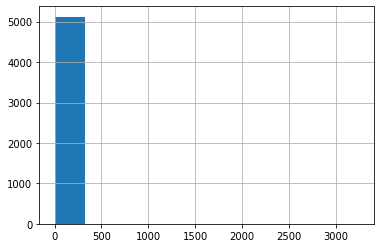

In [14]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count